**Import required libraries**

In [ ]:
import tensorflow as tsf
from numpy import unique,argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

**Load the dataset**

In [ ]:
mnist = tsf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Reshaping the training and testing dataset**

In [ ]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

**Normalize the value of pixels in images**

In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

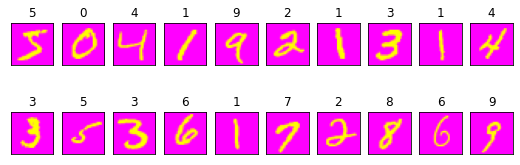

In [ ]:
fig = plt.figure(figsize = (9,3))
for i in range(20):
    ax = fig.add_subplot(2,10,i+1,xticks =[],yticks = [])
    ax.imshow(np.squeeze(x_train[i]),cmap = 'spring')
    ax.set_title(y_train[i])

**Determine the shape of input image**

In [ ]:
img_shape = x_train.shape[1:]
img_shape

(28, 28, 1)

**Define the model**

In [ ]:
import tensorflow as tfs
model = tsf.keras.models.Sequential([tsf.keras.layers.Flatten(input_shape=(28, 28)),

  tsf.keras.layers.Dense(128, activation='relu'),

  tsf.keras.layers.Dropout(0.2),

  tsf.keras.layers.Dense(10)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!pip install graphviz 

In [ ]:
!pip install pydot

In [ ]:
!pip install keras

In [ ]:
predictions = model(x_train[:1]).numpy()

predictions

array([[-0.15696643,  0.16207924,  1.1627783 ,  0.10840061, -0.7404061 ,
        -0.7556015 ,  0.11365962,  0.7375119 ,  0.008075  ,  0.1878801 ]],
      dtype=float32)

In [ ]:
tsf.nn.softmax(predictions).numpy()

array([[0.0672143 , 0.09247439, 0.25154722, 0.08764136, 0.03750395,
        0.03693837, 0.08810349, 0.16441016, 0.07927537, 0.09489135]],
      dtype=float32)

**Compiling the model**

In [ ]:
loss_fn = tsf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

**Train the model**

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2932 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1434 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1056 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0763 - accuracy: 0.9758


**Model evaluation**

In [ ]:
model.evaluate(x_test,  y_test, verbose=5)

[0.07547153532505035, 0.9781000018119812]

**Probablity of the model**

In [ ]:
probability_model = tsf.keras.Sequential([ model, tsf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[7.4406530e-09, 1.4574003e-09, 9.3376784e-06, 2.0117413e-04,
        2.1803124e-11, 1.3281240e-07, 5.4844389e-12, 9.9978775e-01,
        3.9300552e-08, 1.6181714e-06],
       [1.8871595e-10, 7.6282508e-06, 9.9998033e-01, 1.1436716e-05,
        5.1902668e-15, 4.4496762e-08, 2.2229960e-08, 5.7265471e-15,
        6.3718647e-07, 2.1250605e-12],
       [3.7695858e-07, 9.9929881e-01, 1.7971380e-04, 5.2201999e-06,
        2.6564270e-05, 3.0321137e-06, 1.5277712e-05, 3.9401621e-04,
        7.5241420e-05, 1.8679507e-06],
       [9.9945956e-01, 2.4705146e-10, 1.5290774e-04, 5.0551334e-06,
        5.3229667e-07, 3.9348233e-05, 3.1721190e-04, 1.6948546e-07,
        3.2431224e-06, 2.2037337e-05],
       [4.8005467e-07, 4.7192050e-10, 8.8995370e-07, 2.3120192e-08,
        9.9931180e-01, 1.9234820e-07, 1.3025218e-06, 3.2391548e-05,
        5.8281216e-07, 6.5233442e-04]], dtype=float32)>

**Testing the model**

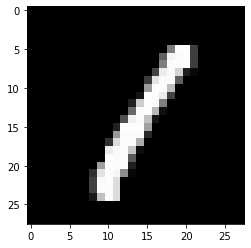

In [ ]:
img = x_train[3]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()